# Iterative solvers

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
import math
import pandas as pd
import scipy
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
from scipy import stats
import sympy as sy
from scipy import sparse

### Problem 1

In [13]:
def p_1(A, b, tol=1e-8, maxiters = 100):
    x_k  =  np.zeros(len(b))
    dist = 10.0
    iters = 0
    while np.linalg.norm(dist) > tol and iters < maxiters:
        d = np.diag(A)
        x_kp1 = x_k + (b - A @ x_k)/d
        dist = x_kp1 - x_k
        x_k = x_kp1
    return x_k     

In [14]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix. 
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
            num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
         A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [15]:
b_1 = np.random.random(10)
A_1 = diag_dom(10)

In [16]:
sol_1 = p_1(A_1, b_1)

In [17]:
np.allclose(A_1 @ sol_1, b_1)

True

### Problem 2

In [26]:
def p_2(A, b, tol=1e-8, maxiters = 100, plot=False):
    x_k  =  np.zeros(len(b))
    dist = 10.0
    iters = 0
    while dist > tol and iters < maxiters:
        d = np.diag(A)
        x_kp1 = x_k + (b - A @ x_k)/d
        dist = np.linalg.norm(x_kp1 - x_k)
        x_k = x_kp1
        if iters == 0:
            abserror = np.array([dist])
        else:
            abserror = np.vstack((abserror, dist))
        iters += 1
    if plot == True:
        dom = np.arange(len(abserror))
        plt.plot(dom, abserror)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute error of approx')
        plt.yscale('log')
        plt.show()
    return x_k     

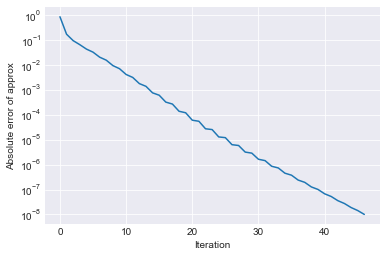

array([ 0.79736239,  0.16333064,  0.00924654, -0.01877113,  0.25288897,
        0.20863953,  0.2235134 ,  0.16371568,  0.14645313,  0.24247287])

In [27]:
p_2(A_1, b_1, plot=True)

### Problem 3

In [34]:
def p_3(A, b, tol=1e-8, maxiters = 100, plot=False):
    x_k  =  np.zeros(len(b))
    dist = 10.0
    iters = 0
    while dist > tol and iters < maxiters:
        for i in range(len(x_k)):
            x_old = x_k.copy()
            x_k[i] = (1/A[i,i])*(b[i] - (A[i, 0:i-1]*x_k[0:i-1]).sum() - (A[i, i+1:]*x_k[i+1:]).sum())
        x_kp1 = x_k.copy()
        dist = np.linalg.norm(x_kp1 - x_old)
        x_k = x_kp1
        if iters == 0:
            abserror = np.array([dist])
        else:
            abserror = np.vstack((abserror, dist))
        iters += 1
    if plot == True:
        dom = np.arange(len(abserror))
        plt.plot(dom, abserror)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute error of approx')
        plt.yscale('log')
        plt.show()
    return x_k

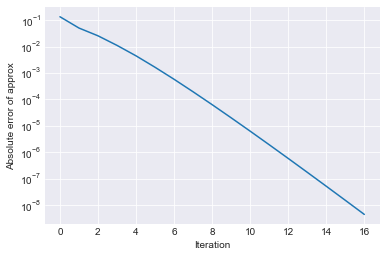

array([ 0.79736239,  0.17449306, -0.03741863,  0.01761014,  0.19831707,
        0.20119791,  0.15529853,  0.13642974,  0.02366636,  0.22758963])

In [35]:
p_3(A_1, b_1, plot=True)

### Problem 4

In [47]:
def p_4(A, b, tol=1e-8, maxiters = 100):
    x_k  =  np.zeros(len(b))
    dist = 10.0
    iters = 0
    while dist > tol and iters < maxiters:
        for i in range(len(x_k)):
            x_old = x_k.copy()
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_k[A.indices[rowstart:rowend]]
            x_k[i] = x_k[i] + (1/A[i,i])*(b[i] - Aix)
        x_kp1 = x_k.copy()
        dist = np.linalg.norm(x_kp1 - x_old)
        x_k = x_kp1
        iters += 1
    return x_k

In [43]:
A_4 = sparse.csr_matrix(diag_dom(5000))
b_4 = np.random.random(5000)

In [48]:
p_4(A_4, b_4)

array([0.00464304, 0.00288515, 0.00276371, ..., 0.00756095, 0.00677911,
       0.00711984])

### Problem 5

In [136]:
def p_5(A, b, w, tol=1e-8, maxiters = 100):
    x_k  =  np.zeros(len(b))
    dist = 10.0
    iters = 0
    while dist > tol and iters < maxiters:
        x_old = x_k.copy()
        for i in range(len(x_k)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_k[A.indices[rowstart:rowend]]
            x_k[i] = x_k[i] + (w/A[i,i])*(b[i] - Aix)
        x_kp1 = x_k.copy()
        dist = np.linalg.norm(x_kp1 - x_old)
        x_k = x_kp1
        iters += 1
    return x_k, iters

In [52]:
p_5(A_4, b_4, 1.0)

(array([0.00464304, 0.00288515, 0.00276371, ..., 0.00756095, 0.00677911,
        0.00711984]), 7)

In [59]:
p_5(A_4, b_4, 1.03)

(array([0.00464299, 0.00288509, 0.00276371, ..., 0.00756094, 0.00677911,
        0.00711984]), 5)

### Problem 6

In [159]:
def p_6(n, w, tol=10e-8, maxiters=100, plot=False):
    
    #Create B
    ones = np.ones(n-1)
    fours = -4*np.ones(n)
    B = np.diag(fours)
    np.fill_diagonal(B[1:], ones)
    np.fill_diagonal(B[:, 1:], ones)
    
    #Create A
    I = np.eye(n)
    BB = np.eye(n)
    II = np.zeros((n, n))
    np.fill_diagonal(II[1:], ones)
    np.fill_diagonal(II[:, 1:], ones)
    A = np.kron(II, I) + np.kron(BB, B)
    A_use = sparse.csr_matrix(A)
    
    #Create b
    b_tile = np.zeros(n)
    b_tile[0] = -100
    b_tile[n-1] = -100
    b = np.tile(b_tile, n)
    
    x_k, iters = p_5(A_use, b, w, tol=tol, maxiters=maxiters)
    
    if plot == True:
        x_grid = np.reshape(x_k, (n,n))
        plt.pcolormesh(np.linspace(0, n, n+1), np.linspace(0, n, n+1), x_grid, cmap='coolwarm')
        plt.show()
        
    return iters

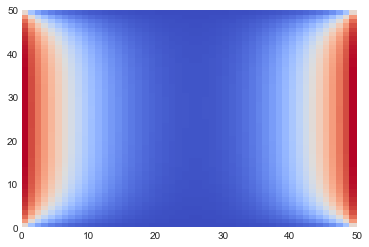

100

In [163]:
p_6(50, 1.0, plot=True)

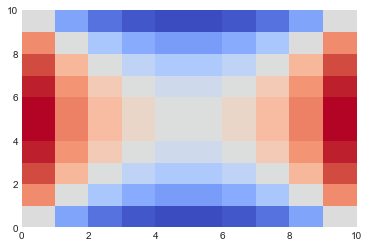

100

In [172]:
p_6(10, 1.0, plot=True)

### Problem 7

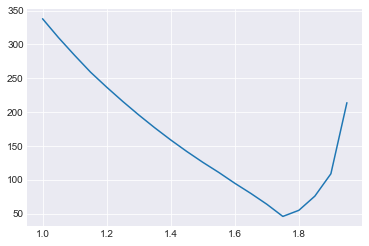

In [171]:
w_7 = np.linspace(1, 1.95, 20)
iterations = np.zeros(20)
for i in range(20):
    iterations[i] = p_6(20, w_7[i], tol=1e-2, maxiters = 1000, plot=False)

plt.plot(w_7, iterations)
plt.show()